==============================================================================================
## Practicum 5: Image search using textures


==============================================================================================



The exercises of this notebook will show how we can perform image similarity search using:

- Gaussian filters
- Descriptors based on texture and color

#### Problem we want to solve
- Given a query image **$x$** and a set of images **$X$** we would like to retreive the most similar to **$x$** images from  **$X$**.

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P5_Student1_Student2.zip** that includes:
    - The notebook P5_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): December 8th, 23:00 h**


 The function should return a feature vector obtained by averaging each filter response on the image.  

**Hint**: Note that since at this moment we are focusing on the texture, we will not use the color of the images.

## Looking at the images

In [1]:
%matplotlib inline

import time
import scipy
import numpy as np
import skimage
from skimage import filters
from skimage import io
import os
from skimage.transform import resize
from scipy.ndimage import convolve
from skimage.color import rgb2gray
from numpy.linalg import norm

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Resize dimension 250 x 250
x = 250
y = 250

path = "./images/texturesimages/pizza/"                       
pizza_images = [resize(skimage.io.imread(path + f), (x, y)) for f in os.listdir(path)]

path = "./images/texturesimages/fish_and_chips/"
fishandchips_images = [resize(skimage.io.imread(path + f), (x, y)) for f in os.listdir(path)]

path = "./images/texturesimages/paella/"
paella_images = [resize(skimage.io.imread(path + f), (x, y)) for f in os.listdir(path)]

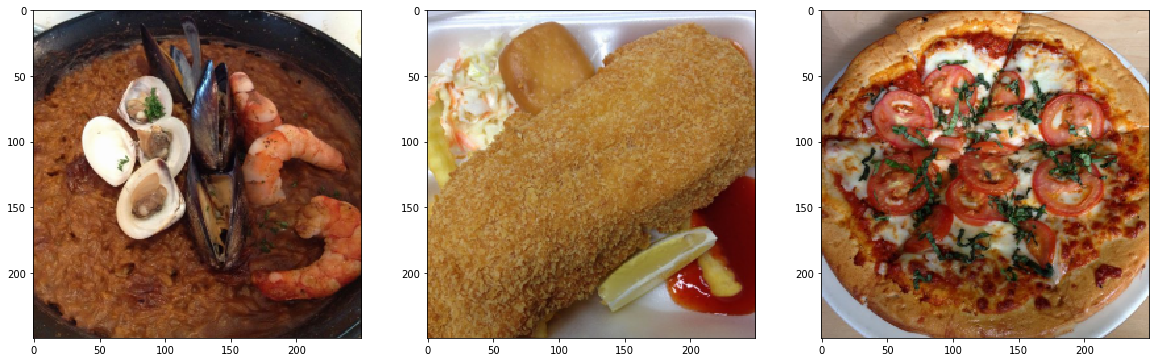

In [3]:
fig, ax= plt.subplots(ncols=3, nrows=1, figsize=(20,30))

ax[0].imshow(paella_images[0])
ax[1].imshow(fishandchips_images[0])
ax[2].imshow(pizza_images[0])
plt.show()

In [4]:
len(paella_images), len(fishandchips_images), len(pizza_images)

(30, 30, 30)

# Filter banks

We can apply a collection of multiple filters that we call a filter bank. Note that if we apply $D$ filters our feature vectors will be $D$ dimensional.

The following image shows a filter bank. In the filter bank we typically want filters to capture a combination of scales, orientations of different types of patterns. This particular filter bank is The Leung-Malik (LM) Filter Bank.

<img src="./images_notebook/filter_bank.png">


## Leung-Malik (LM) Filter Bank

In [5]:
import LM_filters

LM filters imported, the shape of the filter bank is:  (49, 49, 48)


In [6]:
filter_bank = LM_filters.makeLMfilters()
filter_bank.shape

(49, 49, 48)

### Plotting all filters

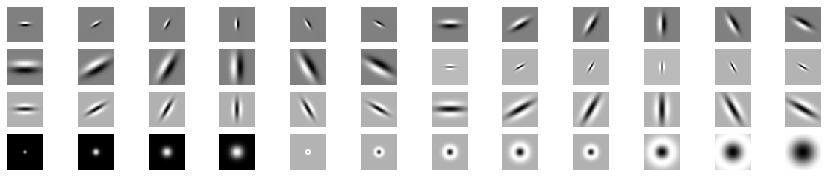

In [7]:
n_filters = filter_bank.shape[-1]

fig, ax = plt.subplots(ncols=12, nrows=4, figsize=(15,3))

k = 0
for i in range(4):
    for j in range(12):
        ax[i,j].imshow(filter_bank[:,:,k], cmap = 'gray')
        ax[i,j].axis("off")
        k = k + 1


## Exercise 5.1 Plot the convolved image by some of the filters


Make a function `visualize_features(im,  filter_bank, n_filters=5)` that recieves the `filter_bank`, an image `im` and an integer `n_filters`. 

The function  must make a plot of two rows containing in the first row, in position $k$, the image convolved by filter $k$. In the second row, in position $k$, the image of the k'th filter. The result for `n_filter=5` should look like 


<img src="./images/filters.png" >


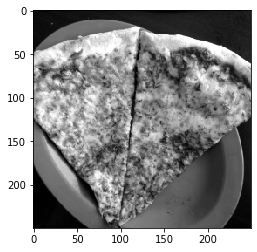

In [8]:
im = pizza_images[5]
im = skimage.color.rgb2gray(im)
plt.imshow(im, cmap="gray")

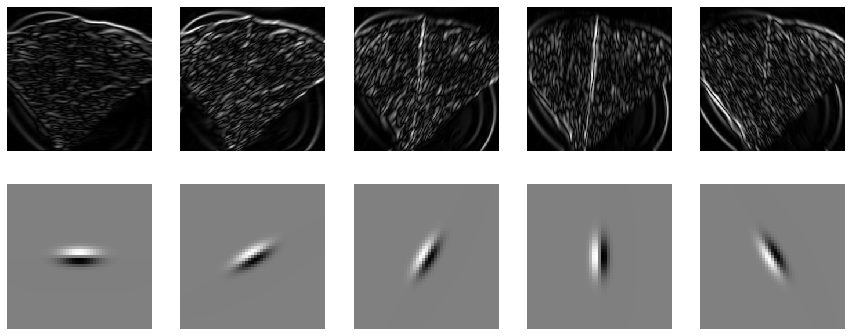

In [9]:
def visualize_features(im,  filter_bank, n_filters = 5):
    fig, ax = plt.subplots(ncols = n_filters, nrows = 2, figsize = (15, 6))
    
    # Iterate over the n_filters value
    for k in range(n_filters):
        # Create the new image that will save the convolved im image
        filtered_img = np.zeros(im.shape)
        
        # Convolve the im image with the k'th filter in the filter_bank
        # and save the result in the filtered_img
        # Remember to absolutize the filtered_img 
        convolve(im, filter_bank[:, :, k], output=filtered_img)
        filtered_img = np.abs(filtered_img)
        
        # Plot the filtered_img and the k'th filter in the filter_bank
        ax[0, k].imshow(filtered_img, cmap = 'gray')
        ax[0, k].axis('off')
        ax[1, k].imshow(filter_bank[:, :, k], cmap = 'gray')
        ax[1, k].axis('off')
    
    # Show it all
    plt.show()

# Call the function
visualize_features(im, filter_bank)


## Exercise 5.2 Constructing a feature vector for a given image


Given $D$ filters from the filter bank and a single image `image`, make a function `features_from_filter_bank(image, filter_bank, n_filters)` that returns a feature vector of shape `n_filters`. The returned vector must contain at position $k$ the mean of the absolute value of the convolved image by filter $k$.

$$
\text{feat}(x) = \left( \text{mean}( |r_1|), \dots,\text{mean}(|r_D|) \right)
$$



In [10]:
im = skimage.color.rgb2gray(pizza_images[0])

def features_from_filter_bank(image, filter_bank, n_filters):
    # Create the new image that will save the convolved image
    # Create the array that will save the data for each feature (the mean of the convolved image) 
    im_conv = np.zeros(image.shape)
    features_for_im = np.zeros(n_filters)
    
    # Iterate over the n_filters value
    for k in range(n_filters):
        
        # Convolve the image with the k'th filter in the filter_bank,
        # save the result in the im_conv image and, save the mean of it
        # in the features_for_im array at its k'th position
        # Remember to absolutize the im_conv image 
        convolve(image, filter_bank[:, :, k], output=im_conv)
        im_conv = np.abs(im_conv)
        features_for_im[k] = np.mean(im_conv)
        
    # Finally return the feature vector
    return features_for_im

# Call the function
features_for_im = features_from_filter_bank(im, filter_bank, n_filters)

# Let's see the result
print('Features from image', features_for_im, sep='\n')

Features from image
[1.72558991e-02 1.64405826e-02 1.47947771e-02 1.36167461e-02
 1.41317260e-02 1.56693482e-02 9.99954728e-03 9.08532685e-03
 8.04501303e-03 7.37077731e-03 7.74814926e-03 8.74499247e-03
 6.76226404e-03 6.08378843e-03 5.11410935e-03 4.84727425e-03
 5.38600349e-03 5.98291181e-03 8.03727392e-03 7.59679589e-03
 6.99035925e-03 6.30493242e-03 6.74072480e-03 7.43274621e-03
 2.70821493e-03 2.38752031e-03 2.21787896e-03 1.92192867e-03
 2.08134583e-03 2.31049376e-03 1.31501997e-03 1.14185964e-03
 1.02552750e-03 8.95460630e-04 9.95367256e-04 1.11154531e-03
 1.52807819e+00 3.05615639e+00 4.58423451e+00 6.11213592e+00
 7.64039096e-01 3.82019548e-01 2.54679570e-01 1.90894979e-01
 2.54679570e-01 1.17339882e-01 3.72713974e-02 2.82647993e-03]


## Exercise 5.3 Constructing the matrix of the feature vectors for all images

Implement a function `get_class_Features(all_images, filter_bank)` that applies `features_from_filter_bank` to get a feature vector for each of the images in the union of the three datasets (fish and chips_images, pizza, paella). It must return a matrix containing at row $k$ feature vector for the input image $k$.


Wall time: 7min 49s

In [11]:
all_images = pizza_images + fishandchips_images + paella_images

In [12]:
%%time

def get_class_features(all_images, filter_bank):
    # Get te number of images
    # Get the number of filters
    # Create the matrix that will save the data of each image feature vector
    n_images = len(all_images)
    n_filters = filter_bank.shape[-1]
    all_feature_vectors = np.zeros((n_images, filter_bank.shape[-1]))
    
    # Iterate over the n_images value    
    for k in range(n_images):
        # Get the k'th image and convert it to
        # grayscale in order to operate with it
        image = all_images[k]
        image = rgb2gray(image)
        image = resize(image, (150, 150))
        
        # Save the corresponding feature vector in the k'th position of the matrix
        all_feature_vectors[k] = features_from_filter_bank(image, filter_bank, n_filters)
        
    # Return the matrix of feature vectors
    return all_feature_vectors

# Call the function
all_feature_vectors=get_class_features(all_images,  filter_bank)

Wall time: 11min 14s


In [13]:
# Let's see the result, just print the feature vector for the first image
print('Features from the first image', all_feature_vectors[0], sep='\n')

Features from the first image
[1.93305686e-02 1.77819322e-02 1.58996178e-02 1.45329268e-02
 1.50895897e-02 1.70415306e-02 1.04310503e-02 9.02181355e-03
 7.52959911e-03 7.29833604e-03 8.26226823e-03 9.07682794e-03
 6.89476546e-03 5.71686177e-03 4.66207120e-03 4.63054303e-03
 5.49343851e-03 6.11384985e-03 9.94659303e-03 8.97606767e-03
 8.34516261e-03 7.29811908e-03 7.90966823e-03 8.68568984e-03
 3.03696947e-03 2.52473289e-03 2.24017971e-03 2.04171470e-03
 2.25540026e-03 2.46123661e-03 1.39918040e-03 1.12078000e-03
 9.58938175e-04 8.79191219e-04 1.11822557e-03 1.13221546e-03
 1.52801653e+00 3.05603307e+00 4.58404953e+00 6.11188929e+00
 7.64008266e-01 3.82004133e-01 2.54669293e-01 1.90887277e-01
 2.54669293e-01 1.17335147e-01 3.72698935e-02 2.43990137e-03]


## Exercise 5.4 Visualizing the features of an image

Define a function `visualize_features` that given a feature index and an array containing all feature vectors, plots its values for the three datasets using different colors for each dataset (in total plots should contain 3 colors).


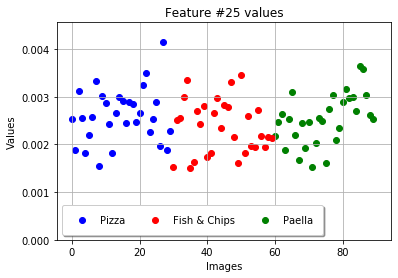

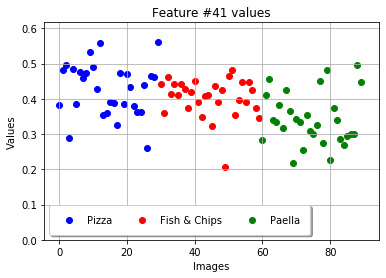

In [14]:
def visualize_features(k, all_feature_vectors):
    # Get the lenght of the different datasets
    # This data will be used to pull apart the datasets
    # and plot each feature value related to them
    pizza_len = len(pizza_images)
    fishchips_len = len(fishandchips_images)
    paella_len = len(paella_images)
    
    # Get each dataset from all_feature_vectors
    pizza_dataset = all_feature_vectors[ : pizza_len]
    fishchips_dataset = all_feature_vectors[pizza_len : (pizza_len + fishchips_len)]
    paella_dataset = all_feature_vectors[(pizza_len + fishchips_len) : (pizza_len + fishchips_len + paella_len)]
    
    # Create an x_axis array for the values at the X axis of the graph
    # This will be the max len of all the datasets (even we know the three have the same size)
    x_axis = np.arange(max(pizza_len, fishchips_len, paella_len))
    
    # Iterate over the x_axis and plot each feature vector
    # The last plot will be save it (because updates its value with each iteration)
    # for being used in the legend of the graph
    for x in range(len(x_axis)):
        # The pizza images feature vectors plots will be blue
        pizza_plts = plt.scatter(x, pizza_dataset[x, k], color = 'blue')
        # The fish & chips images feature vectors plots will be red
        fishchips_plts = plt.scatter(pizza_len + x, fishchips_dataset[x, k], color = 'red')
        # The paella images feature vectors plots will be green
        paella_plts = plt.scatter(pizza_len + fishchips_len + x, paella_dataset[x, k], color = 'green')
    
    # Add a customized legend to the graph
    plt.legend((pizza_plts, fishchips_plts, paella_plts), ('Pizza', 'Fish & Chips', 'Paella'), scatterpoints=1, fancybox=True, 
               framealpha=1, shadow=True, borderpad=1, ncol=3)
    # Set the Y limit a little big higher than the max value at all_feature_vectors in the filter k
    plt.ylim(0.0, max(all_feature_vectors[:, k]) * 1.1)
    # Set some data to the graph
    plt.title('Feature #' + str(k) + ' values')
    plt.ylabel('Values')
    plt.xlabel('Images')
    # Make it grid
    plt.grid()

    # Finally, let's show it all
    plt.show()

    return None

visualize_features(25, all_feature_vectors)    
visualize_features(41, all_feature_vectors)





#### Similarity search

Let us assume $f(x) \in \mathbb{R}^D$ represents a set of features for $x$. Given a query image $x$ and another image $x^m$ from the database, we can compute the distance between images as
$$
\text{distance}\left( f(x) , \, f(x^m) \right) = \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 =  \sqrt{ \sum_{d=1}^\text{D} \left( f(x)_d - f(x^m)_d  \right)^2 }
$$

then we can find the closest image $x^{m^*}$ from the database to $x$ as $m^* =  \text{argmin}_{m} \{ \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 \}$


## Exercise 5.5 Retrieving the most similar images



Implement a function `retrieve_k_images_from_X(query, X, k)` where `query` is an image,  `X` ins the array containing the features from all the images and  `k` is an integer. The function should retrieve the `k` most similar images (according to the l2 norm) and the distances from the closest images to the query image. You can include the query image since it is in `X`.

- Make a plot with the first column beeing the query image and the other k columns the closest images in the feature space.

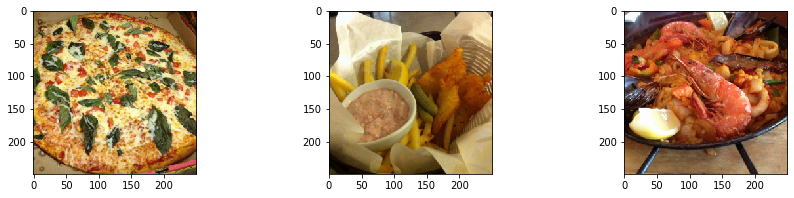

In [15]:
X = np.array(all_feature_vectors)
ind_1 = 10
ind_2 = 40
ind_3 = 70

query_1 = X[10, : ]
query_2 = X[40, : ]
query_3 = X[70, : ]


# Display the query images
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,3))
ax[0].imshow(all_images[10]) 
ax[1].imshow(all_images[40])
ax[2].imshow(all_images[70])

In [16]:
def retrieve_k_images_from_X(query, X, k):
    # Create the lists for save the data
    # - distances, save the distances (using l2 norm) from
    # the query image feature vector and the feature vectors of the X array
    # - closest_to_query, save the indexes of the distances from the 
    # nearest to the distant ones
    # - closest_images, save the k indexes of the distances from the
    # nearest to the distant ones
    distances = list()
    closest_to_query = list()
    closest_images = list()
    
    # Iterate over all the feature vectors
    for im in range(len(X)):
        # Get the current feature vector
        current_feat = X[im]
        
        # Get the distance from the current feature vector to the query feature vector
        # and save it into the distances list
        distance2query = norm(query - current_feat)
        distances.append(distance2query)
    
    # Order the indexes of the distances list from the nearest ones to the distant ones
    closest_to_query = np.argsort(distances)
    
    # Save the first k indexes of closest_to_query in closest_images
    for idx in range(k):
        closest_images.append(closest_to_query[idx])
    
    # Finally, just return the closest_images and distances lists
    return closest_images, distances

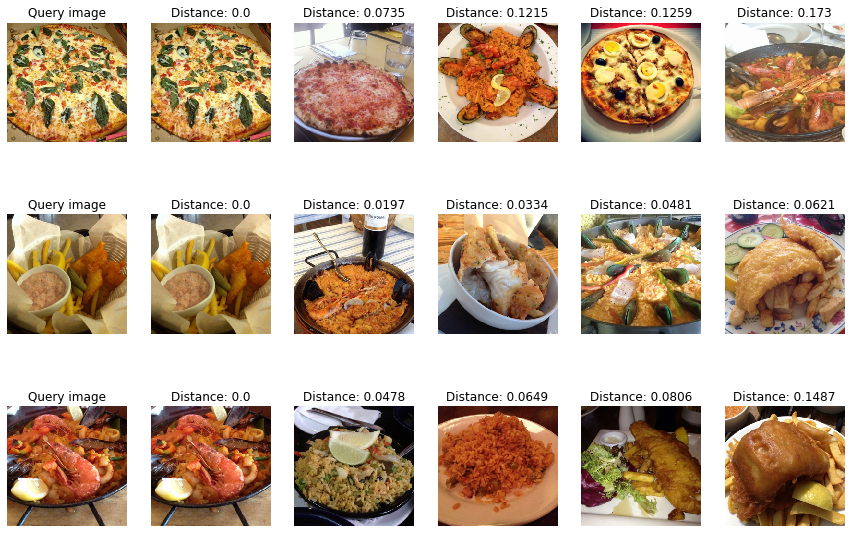

In [17]:
# Get the feature vectors
# and the indexes of the query images
X = np.array(all_feature_vectors)
ind_1 = 10
ind_2 = 40
ind_3 = 70

# Get the feature vector of the query images
query_1 = X[10, : ]
query_2 = X[40, : ]
query_3 = X[70, : ]

# Design a k value, in this case 5 is choosen
k = 5

# Call the function for each query image
# In order to the code to work, is needed to pass the query image feature vector
# instead of the image itself
closest_im_q1, dists_q1 = retrieve_k_images_from_X(query_1, X, k)
closest_im_q2, dists_q2 = retrieve_k_images_from_X(query_2, X, k)
closest_im_q3, dists_q3 = retrieve_k_images_from_X(query_3, X, k)

# Prepare the ploting
# K + 1 columns are needed because the query image will be shown too
fig, ax = plt.subplots(ncols = (k + 1), nrows=3, figsize = (15, 10))

# Plot the three query images
ax[0, 0].imshow(all_images[10])
ax[0, 0].set_title('Query image')
ax[0, 0].axis('off')
ax[1, 0].imshow(all_images[40])
ax[1, 0].set_title('Query image')
ax[1, 0].axis('off')
ax[2, 0].imshow(all_images[70])
ax[2, 0].set_title('Query image')
ax[2, 0].axis('off')

# Plot the k images nearest to their respectively query image
# also print the distance from each one to the query
for im_idx in range(1, (k + 1)):
    ax[0, im_idx].imshow(all_images[closest_im_q1[im_idx - 1]])
    ax[0, im_idx].set_title('Distance: ' + str(round(dists_q1[closest_im_q1[im_idx - 1]], 4)))
    ax[0, im_idx].axis('off')
    ax[1, im_idx].imshow(all_images[closest_im_q2[im_idx - 1]])
    ax[1, im_idx].set_title('Distance: ' + str(round(dists_q2[closest_im_q2[im_idx - 1]], 4)))
    ax[1, im_idx].axis('off')
    ax[2, im_idx].imshow(all_images[closest_im_q3[im_idx - 1]])
    ax[2, im_idx].set_title('Distance: ' + str(round(dists_q3[closest_im_q3[im_idx - 1]], 4)))
    ax[2, im_idx].axis('off')    

# Finally, let's show it all
plt.show()        

## Exercise 5.6 Compute the accuracy of the algorithm: given a query image. 

Make a function 

```
accuracy(X, class_labels, k=5, query=x, class_query=y)
```

That takes as input a the dataset `X`, the `class_labels` for the images, the number of images to retrieve `k`, a query image `x` and the class of the query image `y`. Returns as output the number of retrieved images that belong to class `y` divided by the total of images retrieved `k` (this is the accuracy).

**Hint**: be careful to exclude the query image from the retrieved images.

- Compute the accuracy with k=4 with the previous images. Does the accuracy match the images retrieved from the previous exercise?


In [18]:
class_labels = np.concatenate((np.zeros(30), np.ones(30),  2*np.ones(30))).reshape(90,1)

In [19]:
def accuracy(X, class_labels, k=5, query=x, class_query=y):
    # Complete
    
    closest_im_q, dists_q = retrieve_k_images_from_X(query, X, k)
    
    # In case of the distance is 0 we ignore it since it is the image used for the retrieval
    if dists_q[0] == 0:
        closest_im_q = closest_im_q[1:]
        
    acc = np.mean(class_labels[closest_im_q]==class_query)
    return acc

query_list = [query_1, query_2, query_3]

for n_query in range(len(query_list)):
    print("Accuracy for query", n_query + 1, "is", accuracy(X, class_labels, 4, query_list[n_query], n_query))

Accuracy for query 1 is 0.75
Accuracy for query 2 is 0.5
Accuracy for query 3 is 0.75


## Exercise 5.7 Image retrieval based on texture and color. 

Make a function ` lm_features_rgb(image, filter_bank)`  that returns the features from the filter bank concatenated per color. If the previous feature vectors had 49 components now they will have 49*3 components. 


In [20]:

def lm_features_rgb(image, filter_bank):

    n_filters = filter_bank.shape[-1]
    im_conv = np.array(image[:,:,0])
    features_for_im = np.zeros(3*n_filters)
    # Complete
    features_for_im[:n_filters] = features_from_filter_bank(image[:,:,0],filter_bank,n_filters)
    features_for_im[n_filters:n_filters*2] = features_from_filter_bank(image[:,:,1],filter_bank,n_filters)
    features_for_im[n_filters*2:n_filters*3] = features_from_filter_bank(image[:,:,2],filter_bank,n_filters)
    
    return features_for_im

In [21]:
%%time 
lm_rgb_features = lm_features_rgb(all_images[0], filter_bank)

Wall time: 34.6 s



## Exercise 5.8 Apply the function to all the images in the dataset

Using ` lm_features_rgb(image, filter_bank)` build the features of all the datapoints in and save them in `X_lm_rgb`.
You can parallelize the feature building process using `joblib.Parallel`. This will make the computation much faster if you have a processor with more than two threads.

In [22]:
import multiprocessing as mp
from joblib import Parallel, delayed
from tqdm import tqdm

n_cores = mp.cpu_count()
inputs = tqdm(all_images)

print("Number of processors: ", n_cores)

X_lm_rgb = Parallel(n_jobs=n_cores)(delayed(lm_features_rgb)(i,filter_bank) for i in tqdm(inputs))

  0%|                                                                                           | 0/90 [00:00<?, ?it/s]

Number of processors:  8



100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [07:22<00:00,  4.91s/it]


## 5.9 Compute the accuracy of the method using lm rgb features

Use the function implemented in 5.6 to compute the accuracy of the retrieved images using the features that contain color information. Make a plot of the 4 closest images to the query images in the `lm_rgb` space.

- Is the accuracy higher?

In [ ]:
def plot_imgs(k, data, indexes, idx_im_original):
    
    if k > len(indexes):
        print("Error: k (" + str(k) + ") exceed the number of elements we can plot (" + str(len(indexes)) + ").")
        return
    
    # Adding the original image
    indexes = [idx_im_original] + list(indexes)
    
    # Display
    fig, ax = plt.subplots(ncols=k, nrows=1, figsize=(15,3))
    for i in range(k):
        ax[i].imshow(data[indexes[i]])
        ax[i].axis('off')
    plt.show()

In [ ]:
# compute (X_lm_rgb) and cast it as array
X_lm_rgb = np.array(X_lm_rgb)
ind = [ind_1,ind_2,ind_3]


for i in ind:
    closest_img, distances = retrieve_k_images_from_X(X_lm_rgb[i,:], X_lm_rgb, 80)
    plot_imgs(5, all_images, closest_img, i)
    print("Accuracy for image with index '" + str(i) +  "' is",
          accuracy(X_lm_rgb,class_labels, 4, X_lm_rgb[i,:], class_labels[i]), "\n")
    print("--------------------------------------------------------------------------------------------\n")

#### Answering Questions
The accuracy haven't changed a lot, only for the third query we have an improvement.
Even if we use the Parallel tool to compute the features is still very slow and the results aren't as accurate as we expected.